VGG19

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
np.random.seed(123)
tf.random.set_seed(123)

In [ ]:

train_datagen=ImageDataGenerator(
    rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)


test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
'/content/drive/MyDrive/CNN Banana/dataset/train',
target_size=(150,150),
batch_size=32,
class_mode='categorical',
 shuffle=True
 )

validation_generator=test_datagen.flow_from_directory(
'/content/drive/MyDrive/CNN Banana/dataset/val',
target_size=(150,150),
batch_size=32,
class_mode='categorical',shuffle=True
)
test_generator=test_datagen.flow_from_directory(
'/content/drive/MyDrive/CNN Banana/dataset/test',
)

Found 3454 images belonging to 4 classes.
Found 431 images belonging to 4 classes.
Found 435 images belonging to 4 classes.


In [ ]:
############vgg19

In [ ]:
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

# Define the number of layers to freeze (e.g., the first 18 layers)
num_layers_to_freeze = 18

# Freeze the weights of the first num_layers_to_freeze layers
for layer in conv_base.layers[:num_layers_to_freeze]:
    layer.trainable = False


80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
model= models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(4,activation='softmax'))


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 22122820 (84.39 MB)
Trainable params: 22122820 (84.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

# Define the SGD optimizer with a learning rate (e.g., 0.001)
sgd_optimizer = optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
             optimizer=sgd_optimizer,
             metrics=['acc'])


In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/CNN Banana(80-20)/checkpointcb', save_best_only=True)

In [ ]:

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
5/5 [==============================] - 143s 32s/step - loss: 1.5004 - acc: 0.3063 - val_loss: 1.3715 - val_acc: 0.3187
Epoch 2/100
5/5 [==============================] - 133s 29s/step - loss: 1.3982 - acc: 0.3187 - val_loss: 1.3097 - val_acc: 0.4688
Epoch 3/100
5/5 [==============================] - 164s 38s/step - loss: 1.3693 - acc: 0.3187 - val_loss: 1.3632 - val_acc: 0.3625
Epoch 4/100
5/5 [==============================] - 144s 33s/step - loss: 1.3391 - acc: 0.3875 - val_loss: 1.3012 - val_acc: 0.4750
Epoch 5/100
5/5 [==============================] - 147s 34s/step - loss: 1.2928 - acc: 0.4000 - val_loss: 1.2931 - val_acc: 0.4250
Epoch 6/100
5/5 [==============================] - 144s 33s/step - loss: 1.3385 - acc: 0.3250 - val_loss: 1.2496 - val_acc: 0.3688
Epoch 7/100
5/5 [==============================] - 144s 33s/step - loss: 1.3258 - acc: 0.3750 - val_loss: 1.2726 - val_acc: 0.3750
Epoch 8/100
5/5 [==============================] - 147s 33s/step - loss: 1.1930 - a

In [ ]:
# Load and preprocess the test data
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/CNN Banana/dataset/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffling for test data
)

# Make predictions on the test data
test_predictions = model.predict(test_generator)


Found 435 images belonging to 4 classes.
14/14 [==============================] - 149s 11s/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix

In [ ]:
# Get the true labels from the test generator
true_labels = test_generator.classes

In [ ]:
# Convert predicted probabilities to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

In [ ]:
model.save('my_modelvgg19.keras')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

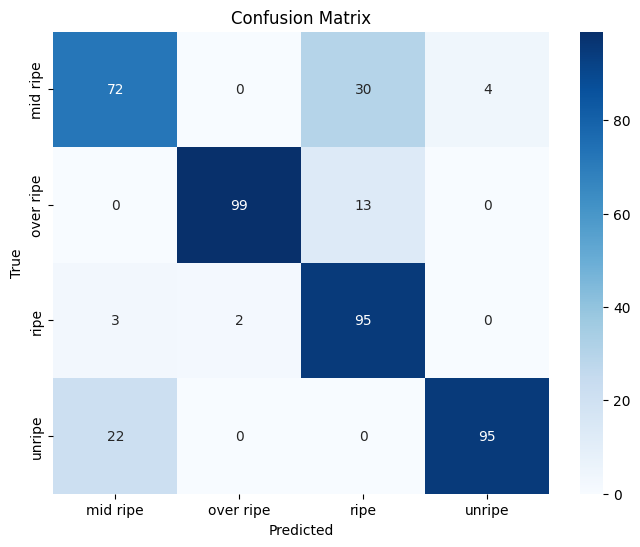

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print classification report
target_names = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=target_names)
print(report)

              precision    recall  f1-score   support

    mid ripe       0.74      0.68      0.71       106
   over ripe       0.98      0.88      0.93       112
        ripe       0.69      0.95      0.80       100
      unripe       0.96      0.81      0.88       117

    accuracy                           0.83       435
   macro avg       0.84      0.83      0.83       435
weighted avg       0.85      0.83      0.83       435



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [ ]:
# Number of classes
num_classes = 4  # Change this to match your number of classes

# Convert true labels to one-hot encoding
true_labels_one_hot = label_binarize(true_labels, classes=range(num_classes))

In [ ]:
# Calculate predicted probabilities for each class
predicted_probabilities = model.predict(test_generator)

14/14 [==============================] - 148s 11s/step


In [ ]:

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_one_hot[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


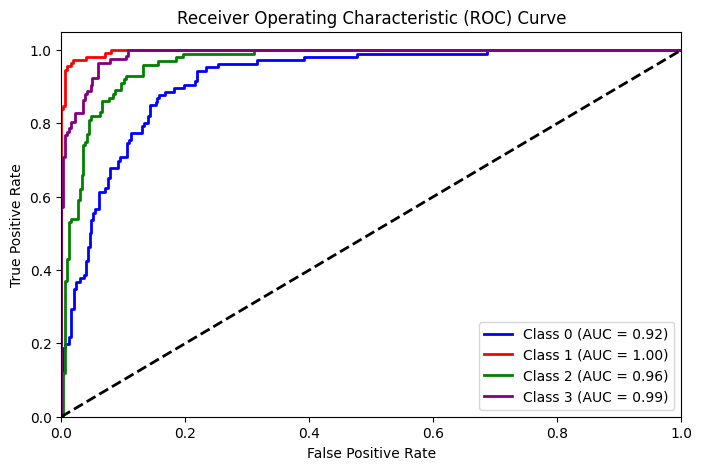

In [ ]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 5))
colors = cycle(['blue', 'red', 'green', 'purple'])  # Change or add more colors as needed

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()